<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/ff%20dz%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt

In [0]:
from sklearn.datasets import load_boston

data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [12]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Проверяем на пустые значения, Пустых строк нет

In [15]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Смотрим типы значений

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Смотрим распределение значений датасета

In [18]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


по двум Параметрам распределение Дискретное

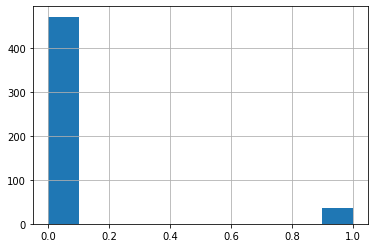

In [22]:
data['CHAS'].hist()

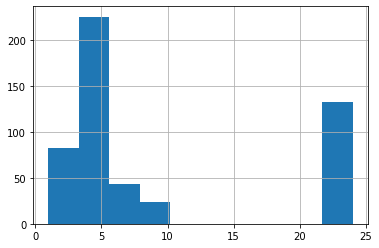

In [23]:
data['RAD'].hist()

Можно попробовать убрать выпады по этим Параметрам, при этом параметр - CHAS со значение 1 вообще имеет малое количество значений

Смотрим распределение всех значений

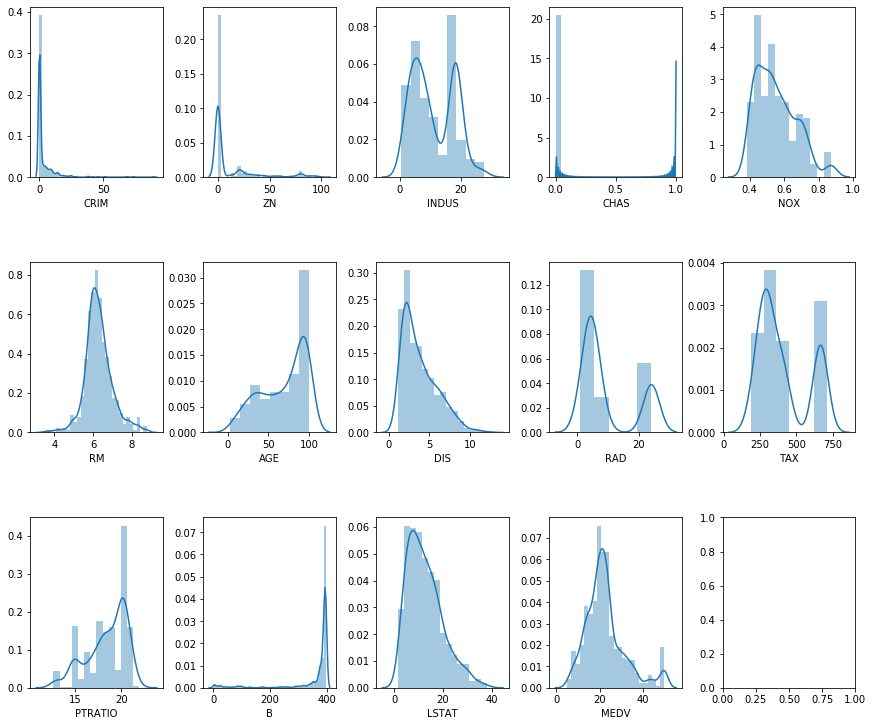

In [26]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Смотрим парные распределения

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


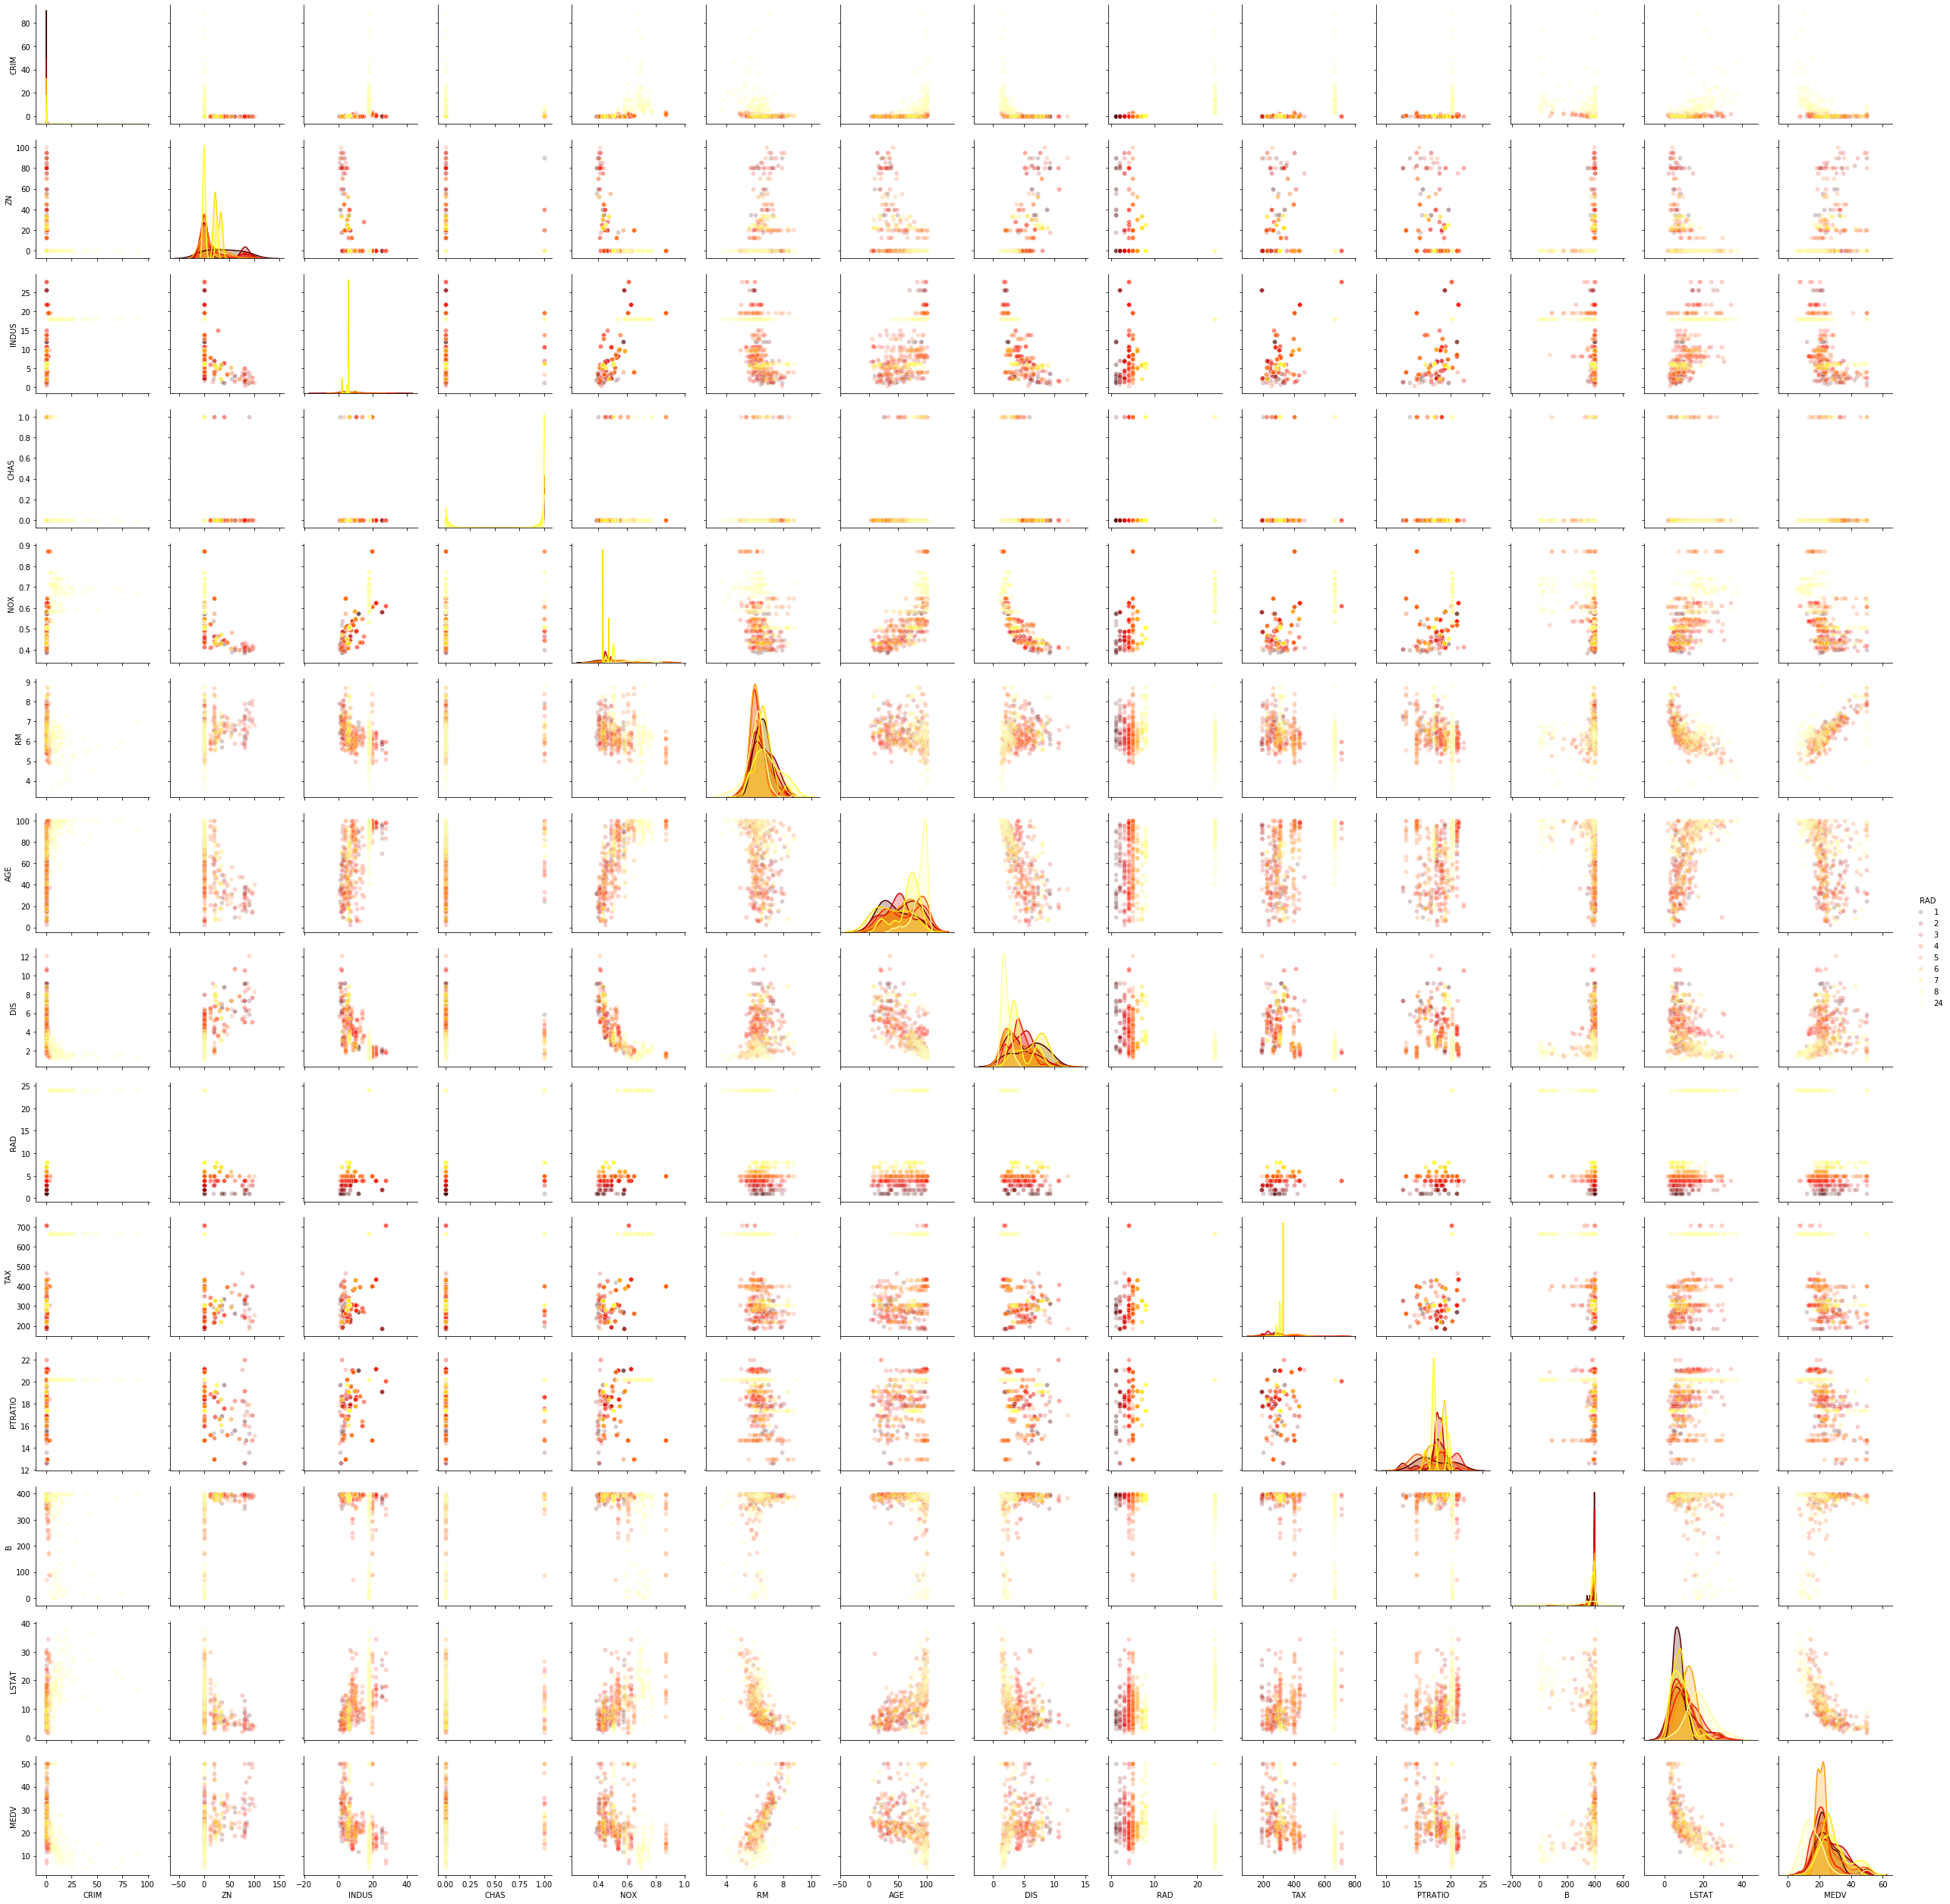

In [28]:
sns.pairplot(data=data,hue='RAD',plot_kws={'alpha':0.2},palette='hot')
plt.show()

смотрим корреляцию

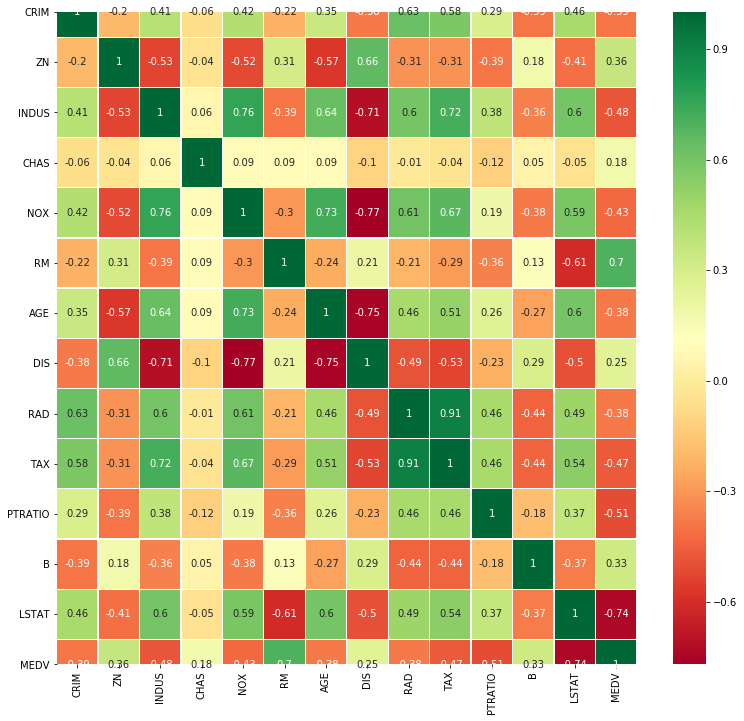

In [29]:
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()


Построим модель Линейной регрессии

In [0]:
train_Y = data['MEDV']
train_X = data.drop('MEDV', axis = 1)

разделяем датасет на 80% и 20%

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_X,
                                                 train_Y,
                                                 test_size = 0.2,#%80 train, 20% test
                                                 random_state = 30)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(X_train, y_train)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 39.08458849571542
slope: [-1.10214967e-01  4.10654046e-02  1.80366661e-02  3.24554801e+00
 -1.87109384e+01  3.74450628e+00  5.71160169e-03 -1.52545323e+00
  3.21188947e-01 -1.33423934e-02 -9.77173081e-01  7.35729616e-03
 -5.61078681e-01]


Точность модели 14% от среднего значения, по абсолютной ошибке

In [45]:
y_pred = model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred)/ data['MEDV'].mean())
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred))/ data['MEDV'].mean())
print("MAE: \t", mean_absolute_error(y_test, y_pred)/ data['MEDV'].mean())

R2: 	 0.03186986031286317
RMSE: 	 0.1879367452215511
MAE: 	 0.14314286292538056


Уберем из выборки выбросы по RAD и налогам TAX

In [60]:
data_d = data.query('RAD < 20').query('TAX < 500')
data_d.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,0.388774,15.582656,8.420894,0.073171,0.511847,6.388005,60.632249,4.441272,4.455285,311.926829,17.809214,381.042575,10.417453,24.857182
std,0.628724,26.086641,6.004356,0.260770,0.101241,0.670817,28.217681,2.097985,1.643095,67.828288,2.210135,39.567014,5.831720,8.344095
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,187.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057890,0.000000,4.000000,0.000000,0.437000,5.933000,35.900000,2.714700,4.000000,270.000000,16.400000,383.780000,6.120000,19.400000
50%,0.131580,0.000000,6.410000,0.000000,0.493000,6.245000,62.200000,4.052200,4.000000,304.000000,17.900000,392.780000,9.380000,22.800000
75%,0.369200,22.000000,10.010000,0.000000,0.544000,6.727000,88.000000,5.873600,5.000000,384.000000,19.200000,396.330000,13.280000,28.500000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,12.126500,8.000000,469.000000,22.000000,396.900000,34.410000,50.000000


In [61]:
train_Y = data_d['MEDV']
train_X = data_d.drop('MEDV', axis = 1)
X_train,X_test,y_train,y_test = train_test_split(train_X,
                                                 train_Y,
                                                 test_size = 0.2,#%80 train, 20% test
                                                 random_state = 3)
model = LinearRegression()
result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred)/ data_d['MEDV'].mean())
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred))/ data_d['MEDV'].mean())
print("MAE: \t", mean_absolute_error(y_test, y_pred)/ data_d['MEDV'].mean())

R2: 	 0.03399126625521958
RMSE: 	 0.11387170083297896
MAE: 	 0.08659146670572955


Точность модели возросла значительно